In [1]:
import numpy as np

In [2]:
def log_prob(x):
     return -0.5 * np.sum(x ** 2)

In [3]:
def proposal(x, step=1.0):
    # uniform correction is 1.0
    return np.random.uniform(low  = x - 0.5 * step,
                             high = x + 0.5 * step,
                             size = x.shape), 1.0

In [4]:
def mh_sample(size, f_log_prob, f_proposal, x0):
    chain = [x0]
    n_accepted = np.zeros((x0.shape))
    x = x0
    for _ in range(size):
        x_new, correction = f_proposal(x)
        alpha = np.exp(f_log_prob(x_new) - f_log_prob(x)) * correction
        
        accepts = (np.random.random() <= alpha)
        x = x_new * accepts + (~accepts)*x
        n_accepted += accepts.sum(axis=0)
        chain.append(x)

    acceptance_rate = n_accepted / float(size)
    return chain, acceptance_rate

In [5]:
from functools import partial
f_proposal = partial(proposal, step=1)

size = 10000
chain, acceptance_rate = mh_sample(
    size,
    log_prob,
    f_proposal,
    np.array([2.0]))
chain = [state for state, in chain]

print(f"Acceptance rate: {acceptance_rate}")
last_states = ", ".join("{:.5f}".format(state) for state in chain[-10:])
print(f"Last ten states of chain: {last_states}")

Acceptance rate: [0.8909]
Last ten states of chain: 0.46565, 0.43512, 0.21193, 0.10658, -0.27405, 0.10244, 0.38207, 0.02971, -0.05485, 0.33850


In [6]:
from scipy.integrate import quad

def despine(ax, spines=('top', 'left', 'right')):
    for spine in spines:
        ax.spines[spine].set_visible(False)

def plot_samples(ax,
                 chain, 
                 log_prob, 
                 normalize=True,
                 orientation='vertical', 
                 xlims=(-5, 5), 
                 legend=True):

    ax.hist(chain, bins=50, density=True, 
            label="MCMC samples",
            orientation=orientation)
    
    # compute Z
    if normalize:
        Z, _ = quad(lambda x: np.exp(log_prob(x)), -np.inf, np.inf)
    else:
        Z = 1.0
    xses = np.linspace(xlims[0], xlims[1], 1000)
    yses = [np.exp(log_prob(x)) / Z for x in xses]
    if orientation == 'horizontal':
        (yses, xses) = (xses, yses)
    ax.plot(xses, yses, label="true distribution")
    if legend:
        ax.legend(frameon=False)

In [7]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [8]:
def sample_and_display(size, burnin, f_log_prob, f_proposal, x0):
    chain, acceptance_rate = mh_sample(size, f_log_prob, f_proposal, x0)
    print(f"Acceptance rate: {acceptance_rate}")
    fig, ax = plt.subplots()
    plot_samples(ax, [state for state, in chain[burnin:]], f_log_prob)
    despine(ax)
    ax.set_yticks(())
    plt.show()

Acceptance rate: [0.107]


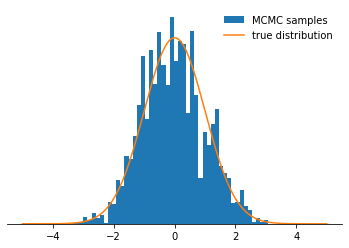

In [9]:
# step too large
size = 10000
step = 30
burnin = 500
x0 = np.array([2.0])
f_proposal = partial(proposal, step=step)              
sample_and_display(size, burnin, log_prob, f_proposal, x0)

Acceptance rate: [0.9893]


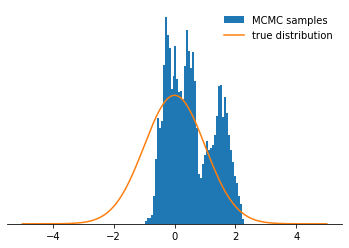

In [10]:
# step too small

size = 10000
step = 0.1
burnin = 500
x0 = np.array([2.0])
f_proposal = partial(proposal, step=step)              
sample_and_display(size, burnin, log_prob, f_proposal, x0)

Acceptance rate: [0.9038]


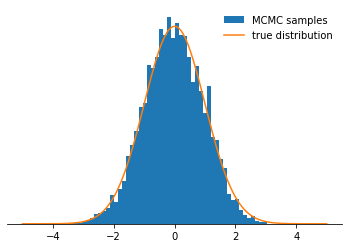

In [11]:
# step is ok
size = 10000
step = 1
burnin = 500
x0 = np.array([2.0])
f_proposal = partial(proposal, step=step)              
sample_and_display(size, burnin, log_prob, f_proposal, x0)